# Kmeans models

In [2]:
# Import external libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# import local
from kmeans_alg import components_optimization,cluster_optimization, kmeans_build

## Data segmenation for training

In [3]:
df_new = pd.read_csv('PreparedData.csv', sep=';', index_col=0)

In [4]:
# Create new data frame without New_Credit_Card_Flag column
df_x = df_new.drop(["New_Credit_Card_Flag"], axis=1)

# Create new data frame with only New_Credit_Card_Flag column
df_y = df_new["New_Credit_Card_Flag"]

In [5]:
# Split data into random train and test subsets (Cross validation)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.2)

Data preparation for Kmeans

In [6]:
kmeans_data = df_new.values

Build kmeans model

In [7]:
kmeans_build(kmeans_data)

The clusters are: [1 1 1 ... 0 0 1]
The inertia is: 58603660.01431063
   Cluster 0  Cluster 1  Cluster 2
0      42877      31479      30377


array([1, 1, 1, ..., 0, 0, 1])

Optimize number of components and clusters

Number of components: 33
Total Variance in our dataset is:  1375.2549589823996
The 95% variance we want to have is:  1306.4922110332795

Variance explain with 1 n_compononets:  942.2245092466275
Variance explain with 2 n_compononets:  1371.7722770132561
Variance explain with 3 n_compononets:  1372.471288080967
Variance explain with 4 n_compononets:  1372.8532221024648
Variance explain with 5 n_compononets:  1373.1963089767946
Variance explain with 10 n_compononets:  1374.384461025218
Variance explain with 15 n_compononets:  1374.8925427643062
Variance explain with 20 n_compononets:  1375.1142599324633
Variance explain with 25 n_compononets:  1375.2230714335121
Variance explain with 30 n_compononets:  1375.2549589823996
Variance explain with 32 n_compononets:  1375.2549589823996


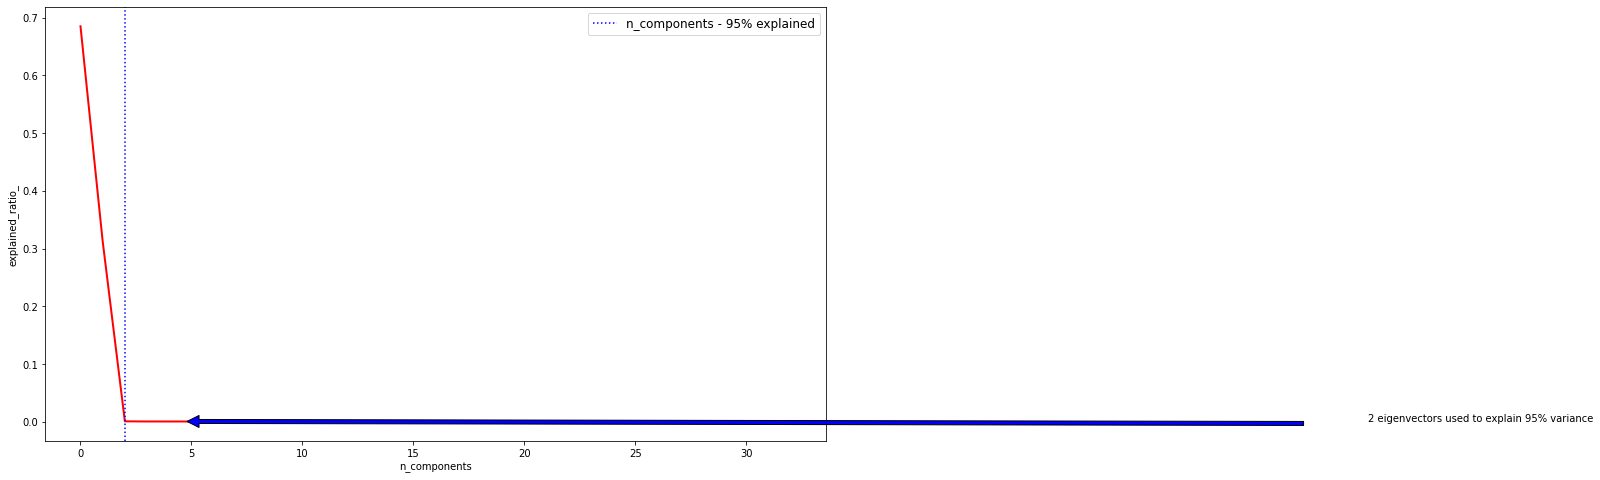

In [8]:
components_optimization(kmeans_data)

Initializing check for optimal number of clusters
The inertia for : 2 Clusters is: 81745650.26097888
Difference in inertia between clusters: 23503369.044119656
The inertia for : 3 Clusters is: 58242281.21685922
Difference in inertia between clusters: 18700188.73996011
The inertia for : 4 Clusters is: 39542092.47689911
Difference in inertia between clusters: 7277395.486824557
The inertia for : 5 Clusters is: 32264696.990074553
Difference in inertia between clusters: 4327413.130289573
The inertia for : 6 Clusters is: 27937283.85978498
Difference in inertia between clusters: 4010447.110200744
The inertia for : 7 Clusters is: 23926836.749584235
Difference in inertia between clusters: 2876954.8060515076
The inertia for : 8 Clusters is: 21049881.943532728
Difference in inertia between clusters: 2214636.14247036
The inertia for : 9 Clusters is: 18835245.801062368


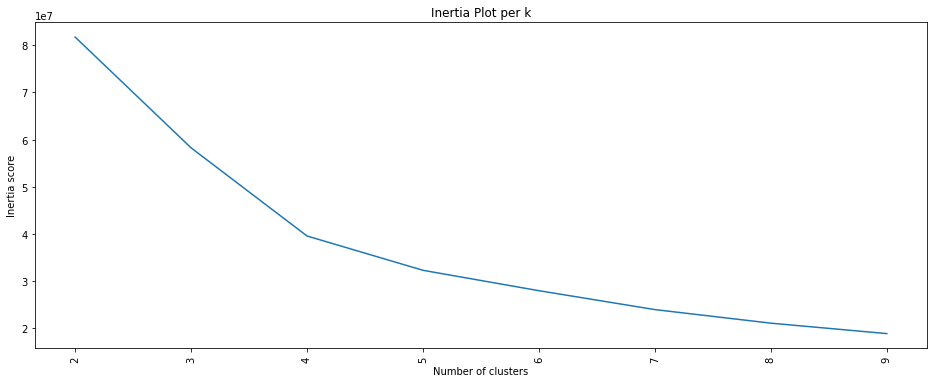

{3: 23503369.044119656, 4: 18700188.73996011, 5: 7277395.486824557, 6: 4327413.130289573, 7: 4010447.110200744, 8: 2876954.8060515076, 9: 2214636.14247036}


In [9]:
cluster_optimization(kmeans_data, 2)

Build kmeans with optimal number of clusters and components

In [10]:
kmeans_build(kmeans_data, 2, 3)

The clusters are: [2 2 2 ... 0 0 0]
The inertia is: 58242281.21685922
   Cluster 0  Cluster 1  Cluster 2
0      42652      30513      31568


array([2, 2, 2, ..., 0, 0, 0])

## Add data using over sampler 

In [11]:
ros = RandomOverSampler(sampling_strategy = 0.5)

x_res, y_res = ros.fit_resample(df_x, df_y)

y_res.value_counts()

0    98933
1    49466
Name: New_Credit_Card_Flag, dtype: int64

In [12]:
x_res["New_Credit_Card_Flag"] = y_res
kmeans_data = x_res.values

In [13]:
kmeans_build(kmeans_data)

The clusters are: [2 2 2 ... 2 1 1]
The inertia is: 77731764.63305515
   Cluster 0  Cluster 1  Cluster 2
0      46642      59242      42515


array([2, 2, 2, ..., 2, 1, 1])

Initializing check for optimal number of clusters
The inertia for : 2 Clusters is: 107374437.26921141
Difference in inertia between clusters: 29642597.89645061
The inertia for : 3 Clusters is: 77731839.3727608
Difference in inertia between clusters: 24816685.418046027
The inertia for : 4 Clusters is: 52915153.954714775
Difference in inertia between clusters: 8965421.66196058
The inertia for : 5 Clusters is: 43949732.292754196
Difference in inertia between clusters: 6356048.067864902
The inertia for : 6 Clusters is: 37593684.22488929
Difference in inertia between clusters: 4954171.53454297
The inertia for : 7 Clusters is: 32639512.690346323
Difference in inertia between clusters: 4016498.409436412
The inertia for : 8 Clusters is: 28623014.28090991
Difference in inertia between clusters: 2677775.6874263883
The inertia for : 9 Clusters is: 25945238.593483523


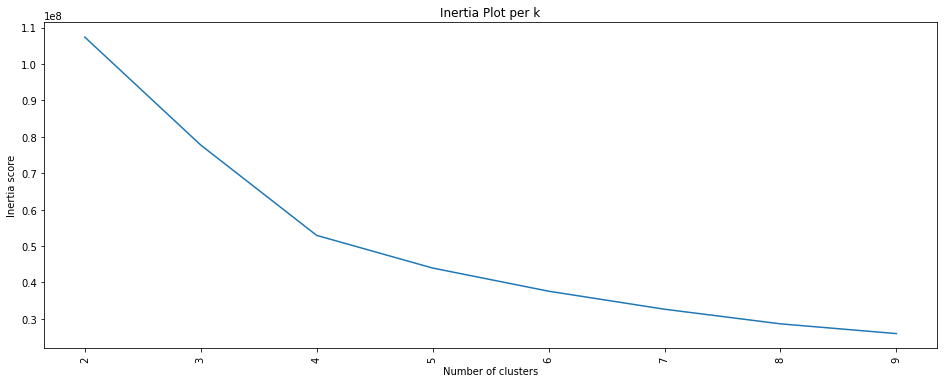

{3: 29642597.89645061, 4: 24816685.418046027, 5: 8965421.66196058, 6: 6356048.067864902, 7: 4954171.53454297, 8: 4016498.409436412, 9: 2677775.6874263883}


In [14]:
cluster_optimization(kmeans_data)

Number of components: 33
Total Variance in our dataset is:  1255.7339028311114
The 95% variance we want to have is:  1192.9472076895559

Variance explain with 1 n_compononets:  865.9249698265935
Variance explain with 2 n_compononets:  1251.8041076708762
Variance explain with 3 n_compononets:  1252.6836009448746
Variance explain with 4 n_compononets:  1253.0959655232239
Variance explain with 5 n_compononets:  1253.4521612753592
Variance explain with 10 n_compononets:  1254.71129040693
Variance explain with 15 n_compononets:  1255.3219133182386
Variance explain with 20 n_compononets:  1255.561048893198
Variance explain with 25 n_compononets:  1255.691626301303
Variance explain with 30 n_compononets:  1255.7339028311114
Variance explain with 32 n_compononets:  1255.7339028311114


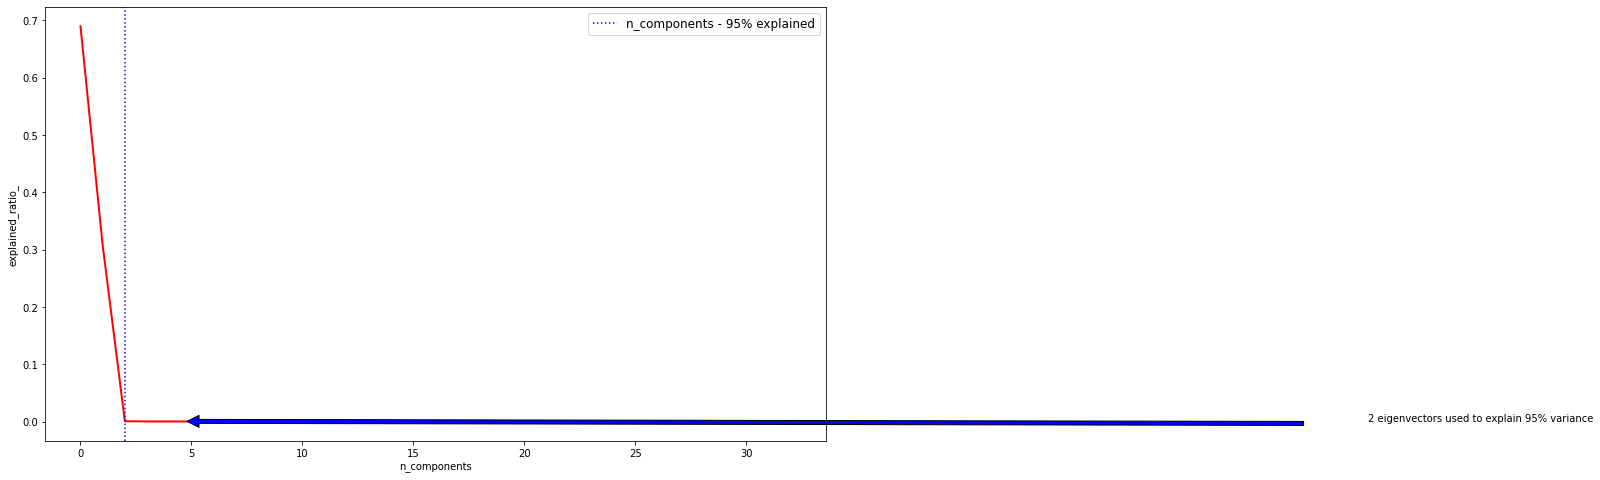

In [15]:
components_optimization(kmeans_data)

Initializing check for optimal number of clusters
The inertia for : 2 Clusters is: 106792630.94032116
Difference in inertia between clusters: 29641108.910280883
The inertia for : 3 Clusters is: 77151522.03004028
Difference in inertia between clusters: 24812564.327617288
The inertia for : 4 Clusters is: 52338957.70242299
Difference in inertia between clusters: 8961035.409321405
The inertia for : 5 Clusters is: 43377922.29310159
Difference in inertia between clusters: 6354128.512844697
The inertia for : 6 Clusters is: 37023793.78025689
Difference in inertia between clusters: 4927259.351165906
The inertia for : 7 Clusters is: 32096534.429090984
Difference in inertia between clusters: 4021203.6775560565
The inertia for : 8 Clusters is: 28075330.751534928
Difference in inertia between clusters: 2799792.481286105
The inertia for : 9 Clusters is: 25275538.270248823


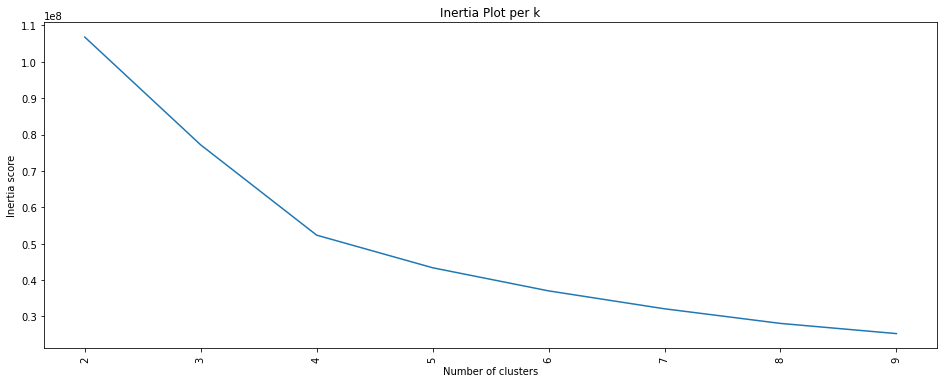

{3: 29641108.910280883, 4: 24812564.327617288, 5: 8961035.409321405, 6: 6354128.512844697, 7: 4927259.351165906, 8: 4021203.6775560565, 9: 2799792.481286105}


In [16]:
cluster_optimization(kmeans_data, 2)

In [17]:
predictions = kmeans_build(kmeans_data, 2, 3)

The clusters are: [2 2 2 ... 2 0 0]
The inertia is: 77151448.28559989
   Cluster 0  Cluster 1  Cluster 2
0      59291      46607      42501


In [ ]:
clustersDF = pd.DataFrame(predictions)